#  bagging,Adaboosting 

# Bagging
* Their predictions are combined:
* For classification → majority voting

For regression → averaging
#Key point: Models are built in parallel, without depending on each other.

#Examples: Random Forest, Bagged Decision Trees.

#✅ Pros: Good for reducing overfitting, stable predictions.


# boosting in ML
* Key point: Models are built in sequence, each correcting the errors of the previous.
* Examples: AdaBoost, Gradient Boosting
* ✅ Pros: Very powerful, reduces bias and variance.


 # boosting type
* adaboosting  ( adaptive boosting)
* Gradiant boosting

In [22]:
# both model ( bagging and boosting )create DicisionTree algorithm

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r'C:\Users\Sarvadnya\FUSIONCLASS\machine_learning\Wine.csv')
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [4]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

<Axes: xlabel='Customer_Segment', ylabel='count'>

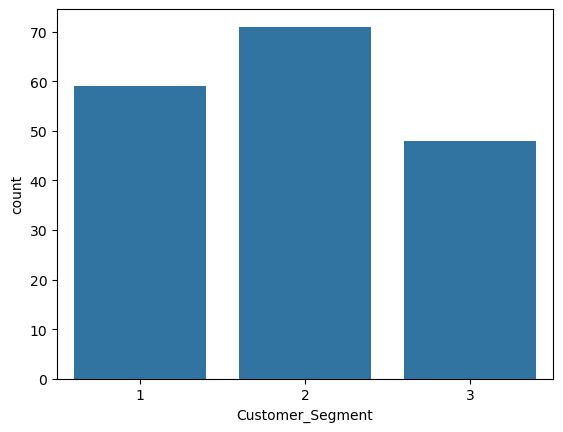

In [5]:
sns.countplot(x=df['Customer_Segment'])

In [6]:
x=df.iloc[:,:-1]
y=df['Customer_Segment']

In [7]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [8]:
lr= LogisticRegression()
lr.fit(xtrain,ytrain)
print(f'training accuracy: {lr.score(xtrain ,ytrain) }')
print(f'testing data:{lr.score(xtest,ytest)}')

training accuracy: 0.971830985915493
testing data:0.9444444444444444


In [9]:
bg=BaggingClassifier(LogisticRegression(),n_estimators=70) # bag of logistic regression model
bg.fit(xtrain,ytrain)
print(f'training accuracy: {bg.score(xtrain ,ytrain) }')
print(f'testing data: {bg.score(xtest,ytest)}')

training accuracy: 0.971830985915493
testing data: 0.9444444444444444


In [10]:
bg=BaggingClassifier(KNeighborsClassifier(),n_estimators=30) # bag of logistic regression model
bg.fit(xtrain,ytrain)
print(f'training accuracy: {bg.score(xtrain ,ytrain) }')
print(f'testing data:{bg.score(xtest,ytest)}')

training accuracy: 0.8309859154929577
testing data:0.6666666666666666


In [11]:
bg=BaggingClassifier(DecisionTreeClassifier(),n_estimators=30) # bag of logistic regression model
bg.fit(xtrain,ytrain)
print(f'training accuracy: {bg.score(xtrain ,ytrain) }')
print(f'testing data:{bg.score(xtest,ytest)}')

training accuracy: 1.0
testing data:0.9722222222222222


# user defined function

In [12]:
def modelbuilding(model):
    model.fit(xtrain,ytrain)
    yp=model.predict(xtest)
    print(f'training accuracy: {model.score(xtrain ,ytrain) }')
    print(f'testing data:{model.score(xtest,ytest)}')
    print(classification_report(ytest,yp))

In [13]:
modelbuilding(LogisticRegression())

training accuracy: 0.971830985915493
testing data:0.9444444444444444
              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.87      1.00      0.93        13
           3       1.00      0.89      0.94         9

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.94        36
weighted avg       0.95      0.94      0.95        36



In [14]:
modelbuilding(DecisionTreeClassifier(max_depth=3))

training accuracy: 0.9929577464788732
testing data:0.8611111111111112
              precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           2       0.75      0.92      0.83        13
           3       1.00      0.67      0.80         9

    accuracy                           0.86        36
   macro avg       0.89      0.84      0.85        36
weighted avg       0.88      0.86      0.86        36



# Hyperparameter tunning

In [15]:
params= {"n_estimators":[20,70,90,110],
         "random_state":[0,1,42,78]  }

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
grid=GridSearchCV(AdaBoostClassifier(),param_grid=params,verbose=1)

In [18]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


,estimator,AdaBoostClassifier()
,param_grid,"{'n_estimators': [20, 70, ...], 'random_state': [0, 1, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,estimator,None


In [19]:
grid.best_estimator_

,estimator,None
,n_estimators,70
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,0


In [20]:
modelbuilding(AdaBoostClassifier(n_estimators=20,random_state=0))

training accuracy: 1.0
testing data:0.9722222222222222
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36



In [21]:
params={
    'n_estimators':[50,90,120],
    'learning_rate':[0.1,0.2,0.01],
    'max_depth'   :[3,5,7,9]
}
grid= GridSearchCV(GradientBoostingClassifier(),param_grid=params,verbose=1)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


,estimator,GradientBoostingClassifier()
,param_grid,"{'learning_rate': [0.1, 0.2, ...], 'max_depth': [3, 5, ...], 'n_estimators': [50, 90, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'log_loss'


In [22]:
grid.best_params_

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 90}

In [24]:
modelbuilding(GradientBoostingClassifier(n_estimators=120,learning_rate=0.2,max_depth=3))

training accuracy: 1.0
testing data:0.9722222222222222
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36

